In [2]:
import numpy
from keras.datasets import imdb

from sequence_classifier_comparator import SequenceClassifierComparator
from neural_networks_classifier import NeuralNetworksClassifier
from knn_classifier import KNNClassifier
from svm_classifier import SVMClassifier
from hmm_classifier import HMMClassifier
from results_reader import ResultsReader
from results_writer import ResultsWriter

In [181]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
(X_train, y_train), (X_test, y_test) = get_sentiment_data(train_test_ratio = 0.5)

X = numpy.concatenate((X_train, X_test))
y = numpy.concatenate((y_train, y_test))

In [228]:
from numpy import genfromtxt
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer

def get_train_and_test(data, ratio = 0.8):
    temp_data = data.copy()
    numpy.random.shuffle(temp_data)
    return temp_data[:int(ratio*len(temp_data))], temp_data[int(ratio*len(temp_data)):]

def get_X_y(data):
#     vectorizer = CountVectorizer()
    docs = [x[0] for x in data]
    t = Tokenizer()
    t.fit_on_texts(docs)
    print(t.word_counts)
    return numpy.array(docs) , numpy.array([x[1] for x in data])

def get_sentiment_data(train_test_ratio = 0.8):
    sentiment_amazon = genfromtxt('datasets/sentiment/amazon_cells_labelled.txt', delimiter='\t', encoding = "utf-8", dtype = None)
    train_amazon, test_amazon = get_train_and_test(sentiment_amazon, train_test_ratio)
    X_train_amazon, y_train_amazon = get_X_y(train_amazon)
    X_test_amazon, y_test_amazon =  get_X_y(test_amazon)
    
    sentiment_imdb = genfromtxt('datasets/sentiment/imdb_labelled.txt', delimiter='\t', encoding = "utf-8", dtype = None)
    train_imdb, test_imdb = get_train_and_test(sentiment_imdb, train_test_ratio)
    X_train_imdb, y_train_imdb = get_X_y(train_imdb)
    X_test_imdb, y_test_imdb =  get_X_y(test_imdb)
    
    sentiment_yelp = genfromtxt('datasets/sentiment/yelp_labelled.txt', delimiter='\t', encoding = "utf-8", dtype = None)
    train_yelp, test_yelp = get_train_and_test(sentiment_yelp, train_test_ratio)
    X_train_yelp, y_train_yelp = get_X_y(train_yelp)
    X_test_yelp, y_test_yelp=  get_X_y(test_yelp)
    
    X_train, y_train = numpy.concatenate((X_train_amazon, X_train_imdb, X_train_yelp)), numpy.concatenate((y_train_amazon, y_train_imdb, y_train_yelp)),
    X_test, y_test = numpy.concatenate((X_test_amazon, X_test_imdb, X_test_yelp)), numpy.concatenate((y_test_amazon, y_test_imdb, y_test_yelp)),

    return (X_train, y_train), (X_test, y_test)

# (X_train, y_train), (X_test, y_test) = get_sentiment_data(train_test_ratio = 0.5)
sentiment_amazon = genfromtxt('datasets/sentiment/amazon_cells_labelled.txt', delimiter='\t', encoding = "utf-8", dtype = None)
train_amazon, test_amazon = get_train_and_test(sentiment_amazon, 0.8)
X_train_amazon, y_train_amazon = get_X_y(train_amazon)

print(X_train_amazon[:2])


OrderedDict([('i', 263), ('know', 5), ('that', 66), ('sounds', 2), ('funny', 1), ('but', 40), ('to', 166), ('me', 23), ('it', 233), ('seemed', 1), ('like', 23), ('sketchy', 1), ('technology', 2), ("wouldn't", 2), ('work', 30), ('well', 29), ('this', 170), ('one', 31), ('works', 42), ('great', 75), ("it's", 22), ('fits', 6), ('a', 186), ('glove', 1), ('and', 254), ('is', 197), ('strong', 4), ('secure', 2), ('durable', 1), ('my', 108), ('phone', 130), ('sounded', 2), ('ok', 2), ('not', 97), ("wife's", 2), ('was', 72), ('almost', 2), ('totally', 1), ('unintelligible', 1), ('she', 4), ("couldn't", 9), ('understand', 2), ('word', 1), ('being', 8), ('said', 4), ('on', 66), ('worked', 13), ('very', 84), ('paired', 2), ('with', 96), ('treo', 4), ('700w', 1), ('as', 35), ('skype', 1), ('headset', 40), ('pc', 3), ('using', 8), ('usb', 4), ('bluetooth', 16), ('transceiver', 1), ('so', 32), ('had', 36), ('take', 7), ('the', 412), ('battery', 35), ('out', 17), ('of', 96), ('put', 5), ('all', 35), (

In [207]:
X = X[:1000]
y = y[:1000]

In [216]:
comparator = SequenceClassifierComparator(ResultsWriter(), ResultsReader())

In [217]:
nn_classifier = NeuralNetworksClassifier(top_words=top_words)
nn_transformer = nn_classifier.get_transformer()
comparator.add_classifier(nn_classifier, sequence_transformer=nn_transformer)

In [209]:
svm_classifier = SVMClassifier()
svm_transformer = svm_classifier.get_transformer()
comparator.add_classifier(svm_classifier, sequence_transformer=svm_transformer)

In [ ]:
knn_classifier = KNNClassifier(n_neighbors=1)
knn_transformer = knn_classifier.get_transformer()
comparator.add_classifier(knn_classifier, sequence_transformer=knn_transformer)

In [218]:
comparator.fit_predict(X, y, rounds=2)

ValueError: invalid literal for int() with base 10: 'disappointing.'

--------------
SVM
{}


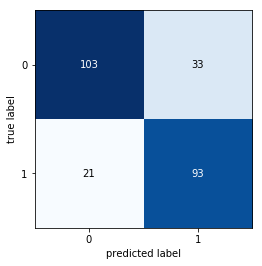

--------------
SVM
{}


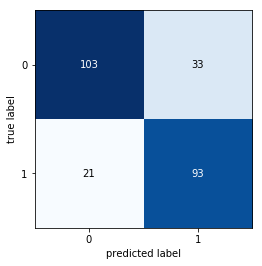

--------------
SVM
{}


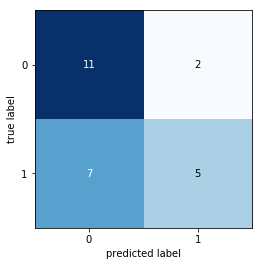

--------------
SVM
{}


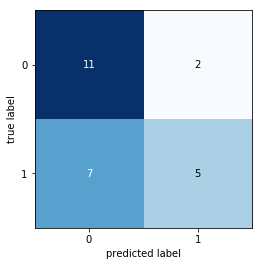

In [8]:
comparator.plot_comparison()